In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
from google.colab import drive
drive.mount('/content/gdrive')
iris = load_iris()
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/files/IRIS.csv")
data.drop("variety", inplace=True, axis=1)

data = data.dropna(axis = 0)
data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


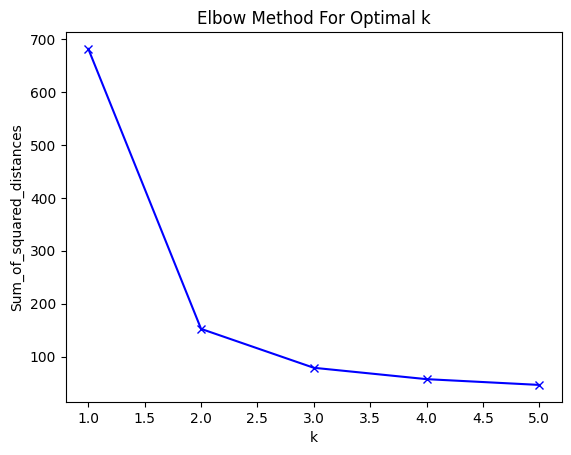

In [44]:
# Implement the algorithm using scikit-learn
from sklearn.cluster import KMeans

K = range(1, 6)
sum_of_squared_distances = []

for k in K:
  kmeans = KMeans(n_clusters = k, init= "k-means++", n_init= "auto", max_iter= 300, tol= 0.0001, verbose= 0, random_state= None, copy_x= True, algorithm= "lloyd")
  kmeans = kmeans.fit(data)
  sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
k = 3
kmeans = KMeans(n_clusters = k, init= "k-means++", n_init= "auto", max_iter= 300, tol= 0.0001, verbose= 0, random_state= None, copy_x= True, algorithm= "lloyd")

kmeans.fit(data)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_

label = kmeans.fit_predict(data)

In [46]:
silhouette = silhouette_score(data, labels)
db_index = davies_bouldin_score(data, labels)
ch_index = calinski_harabasz_score(data, labels)
ari = adjusted_rand_score(iris.target, labels)
mi = mutual_info_score(iris.target, labels)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")
print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Mutual Information (MI): {mi:.2f}")

Silhouette Score: 0.55
Davies-Bouldin Index: 0.66
Calinski-Harabasz Index: 561.63
Adjusted Rand Index: 0.73
Mutual Information (MI): 0.83


zeros : 39
ones : 50
twos :61


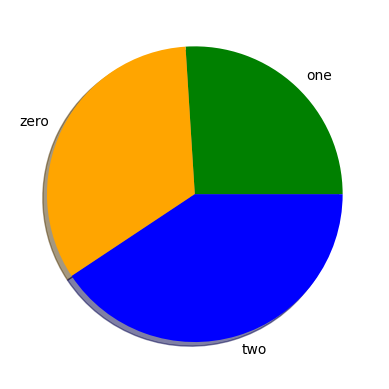

In [47]:
zero = list(label).count(0)
one = list(label).count(1)
two = list(label).count(2)

x_axis = []
x_axis.append(zero)
x_axis.append(one)
x_axis.append(two)

colors = ['green', 'orange', 'blue']

print("zeros : " + str(x_axis[0]) +
      "\nones : " + str(x_axis[1])+
      "\ntwos :" + str(x_axis[2]))

y = ['one', 'zero', 'two']

plt.pie(x_axis, labels=y, colors=colors, shadow='true')
plt.show()